In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io

In [ ]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=66)

model.train(
    train_images =  "/content/drive/MyDrive/dataset/training/immagini/",
    train_annotations = "/content/drive/MyDrive/dataset/training/labels/",
    checkpoints_path = None , #/content/drive/MyDrive/fcn32resnet50/fcn_32_resnet50_1
    epochs=5,
    batch_size = 2,
    auto_resume_checkpoint=False,
    verify_dataset = False,
    steps_per_epoch = 2500,
    validate = None,
    val_images =  "/content/drive/MyDrive/dataset/validation/immagini/",
    val_annotations= "/content/drive/MyDrive/dataset/validation/labels/",
    val_batch_size=2,
    gen_use_multiprocessing=True,
    optimizer_name='adam'
)

Epoch 1/5
2500/2500 [==============================] - 6529s 3s/step - loss: 1.1896 - accuracy: 0.6865
Epoch 2/5
2500/2500 [==============================] - 2044s 818ms/step - loss: 0.9278 - accuracy: 0.7461
Epoch 3/5
2500/2500 [==============================] - 2047s 819ms/step - loss: 0.8419 - accuracy: 0.7670
Epoch 4/5
2500/2500 [==============================] - 2047s 819ms/step - loss: 0.7880 - accuracy: 0.7798
Epoch 5/5
2500/2500 [==============================] - 2046s 818ms/step - loss: 0.7485 - accuracy: 0.7892


In [ ]:
from keras_segmentation.predict import get_colored_segmentation_image,predict_multiple,evaluate

color_map = np.asarray([
      [165, 42, 42],
      [0, 192, 0],
      [196, 196, 196],
      [190, 153, 153],
      [180, 165, 180],
      [102, 102, 156],
      [102, 102, 156],
      [128, 64, 255],
      [140, 140, 200],
      [170, 170, 170],
      [250, 170, 160],
      [96, 96, 96],
      [230, 150, 140],
      [128, 64, 128],
      [110, 110, 110],
      [244, 35, 232],
      [150, 100, 100],
      [70, 70, 70],
      [150, 120, 90],
      [220, 20, 60],
      [255, 0, 0],
      [255, 0, 0],
      [255, 0, 0],
      [200, 128, 128],
      [255, 255, 255],
      [64, 170, 64],
      [128, 64, 64],
      [70, 130, 180],
      [255, 255, 255],
      [152, 251, 152],
      [107, 142, 35],
      [0, 170, 30],
      [255, 255, 128],
      [250, 0, 30],
      [0, 0, 0],
      [220, 220, 220],
      [170, 170, 170],
      [222, 40, 40],
      [100, 170, 30],
      [40, 40, 40],
      [33, 33, 33],
      [170, 170, 170],
      [0, 0, 142],
      [170, 170, 170],
      [210, 170, 100],
      [153, 153, 153],
      [128, 128, 128],
      [0, 0, 142],
      [250, 170, 30],
      [192, 192, 192],
      [220, 220, 0],
      [180, 165, 180],
      [119, 11, 32],
      [0, 0, 142],
      [0, 60, 100],
      [0, 0, 142],
      [0, 0, 90],
      [0, 0, 230],
      [0, 80, 100],
      [128, 64, 64],
      [0, 0, 110],
      [0, 0, 70],
      [0, 0, 192],
      [32, 32, 32],
      [0, 0, 0],
      [0, 0, 0],
      ])


out = predict_multiple(model=model, inps=None, inp_dir='/content/drive/MyDrive/immaginitest', out_dir='/content/drive/MyDrive/data',
                     checkpoints_path=None, overlay_img=False,
                     class_names=None, show_legends=False, colors=color_map,
                     prediction_width=None, prediction_height=None, read_image_type=1)




100%|██████████| 6/6 [00:21<00:00,  3.51s/it]


In [ ]:
model.save()

In [ ]:
evaluate(model=model, inp_images=None, annotations=None,
             inp_images_dir='/content/drive/MyDrive/immaginiiou', annotations_dir='/content/drive/MyDrive/annotazioni', checkpoints_path=None, read_image_type=1)

4it [00:09,  2.31s/it]


{'class_wise_IU': array([0.05388547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 'frequency_weighted_IU': 0.05032439502954125,
 'mean_IU': 0.0008164465190592

In [ ]:
from keras_segmentation.data_utils.data_loader import get_image_array
from keras_segmentation.models.config import IMAGE_ORDERING
import cv2
x = get_image_array('/content/drive/MyDrive/immaginitest/WEiJ6ccLz4OsXfWhKAIboQ.jpg', 608, 416,
                      ordering=IMAGE_ORDERING)
pr = model.predict(np.array([x]))[0]
pr = pr.reshape((208,  304, 66)).argmax(axis=2)
pr = cv2.resize(pr, (1920, 1080), interpolation=cv2.INTER_NEAREST)


In [ ]:
pr.max()

56

In [ ]:
import imageio
imageio.imsave('/content/drive/MyDrive/bn/WEiJ6ccLz4OsXfWhKAIboQ.jpg',pr, np.uint8)

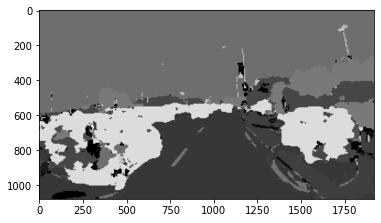

In [ ]:
plt.figure(1)
plt.imshow(pr,clim = [0,65],cmap = 'gray')

In [ ]:
import os,re
#from PIL import Image
import skimage.io as io
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
color_map = np.asarray([
      [165, 42, 42],
      [0, 192, 0],
      [196, 196, 196],
      [190, 153, 153],
      [180, 165, 180],
      [102, 102, 156],
      [102, 102, 156],
      [128, 64, 255],
      [140, 140, 200],
      [170, 170, 170],
      [250, 170, 160],
      [96, 96, 96],
      [230, 150, 140],
      [128, 64, 128],
      [110, 110, 110],
      [244, 35, 232],
      [150, 100, 100],
      [70, 70, 70],
      [150, 120, 90],
      [220, 20, 60],
      [255, 0, 0],
      [255, 0, 0],
      [255, 0, 0],
      [200, 128, 128],
      [255, 255, 255],
      [64, 170, 64],
      [128, 64, 64],
      [70, 130, 180],
      [255, 255, 255],
      [152, 251, 152],
      [107, 142, 35],
      [0, 170, 30],
      [255, 255, 128],
      [250, 0, 30],
      [0, 0, 0],
      [220, 220, 220],
      [170, 170, 170],
      [222, 40, 40],
      [100, 170, 30],
      [40, 40, 40],
      [33, 33, 33],
      [170, 170, 170],
      [0, 0, 142],
      [170, 170, 170],
      [210, 170, 100],
      [153, 153, 153],
      [128, 128, 128],
      [0, 0, 142],
      [250, 170, 30],
      [192, 192, 192],
      [220, 220, 0],
      [180, 165, 180],
      [119, 11, 32],
      [0, 0, 142],
      [0, 60, 100],
      [0, 0, 142],
      [0, 0, 90],
      [0, 0, 230],
      [0, 80, 100],
      [128, 64, 64],
      [0, 0, 110],
      [0, 0, 70],
      [0, 0, 192],
      [32, 32, 32],
      [0, 0, 0],
      [0, 0, 0],
      ])

def atoi(text) :
    return int(text) if text.isdigit() else text

def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]

def segmantation_images(path,new_path, debug_test_num = 0):
    filenames = []

    for root, dirnames, filenames in os.walk(path):
        filenames.sort(key = natural_keys)
        rootpath = root

    #print(filenames)
    count = 0
    for item in filenames:

        if debug_test_num !=0:
            if debug_test_num <= count:
                break

        count = count + 1
        if os.path.isfile(path+item) and not(os.path.isfile(new_path+item)):
            f, e = os.path.splitext(item)
            image_rgb = io.imread(path+item)
            image_rgb = np.asarray(image_rgb)
            image_rgb = np.delete(image_rgb,3,axis = 2)
            new_image = np.zeros((image_rgb.shape[0],image_rgb.shape[1],3)).astype('int')

            for index, row  in enumerate(color_map):
                new_image[(image_rgb[:,:,0]==row[0])&
                          (image_rgb[:,:,1]==row[1])&
                          (image_rgb[:,:,2]==row[2])]=np.array([index+1,index+1,index+1]).reshape(1,3)

            new_image = new_image[:,:,0]
            output_filename = new_path+f+'.png'
            cv2.imwrite(output_filename,new_image)
            print('writing file: ',output_filename)

        else:
            print('no file')

    print("number of files written: ",count)


segmantation_images('/content/drive/MyDrive/annotazioni/','/media/')


writing file:  /media/WEiJ6ccLz4OsXfWhKAIboQ.png
writing file:  /media/Z8HD6Drv-f1ihS8RezXFyQ.png
writing file:  /media/ZlIseyu88ZRt6zHUMZb-Ag.png
writing file:  /media/jqh8xIPwEZiRmWEwY9ZVaA.png
number of files written:  4


In [ ]:
from keras_segmentation.metrics import get_iou

annotazione = io.imread('/media/WEiJ6ccLz4OsXfWhKAIboQ.png')
res = get_iou(annotazione,pr,66)

In [ ]:
res

array([0.07198706, 0.        , 0.        , 0.19320308, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.72631382,
       0.        , 0.09929505, 0.        , 0.29390834, 0.        ,
       0.00633965, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.95632394, 0.06321261,
       0.        , 0.68971345, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.19179266, 0.07455299, 0.        , 0.        , 0.0212    ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.6504778 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
i = 0
sum =0
for elem in res:
  if elem != 0:
    i=i+1
    sum += elem

print(sum/i)

0.3106400341178807
